Based on 

Ref - https://towardsdatascience.com/image-color-identification-with-machine-learning-and-image-processing-using-python-f3dd0606bdca
ref - https://towardsdatascience.com/image-color-identification-with-machine-learning-and-image-processing-using-python-f3dd0606bdca



# Color Identification
Aug 2021


In [ ]:
# Update pip
%pip install -U pip

In [ ]:
# Install scikit-image
%pip install -U scikit-image

In [ ]:
%pip install opencv-python-headless

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
import skimage
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import cv2

In [2]:
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8

In [19]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

# new function to get color name
def getColorName(R,G,B):
    minimum = float("inf")
    cname=""
    for i in range(len(csv)):
        d = abs(R - int(csv.loc[i,"R"])) + abs(G - int(csv.loc[i,"G"])) + abs(B - int(csv.loc[i,"B"]))
        if d <= minimum:
            minimum = d
            cname = csv.loc[i, "color_name"]
    return cname

# gets the colors from a image
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

The type of this input is <class 'numpy.ndarray'>
Shape: (3000, 4000, 3)


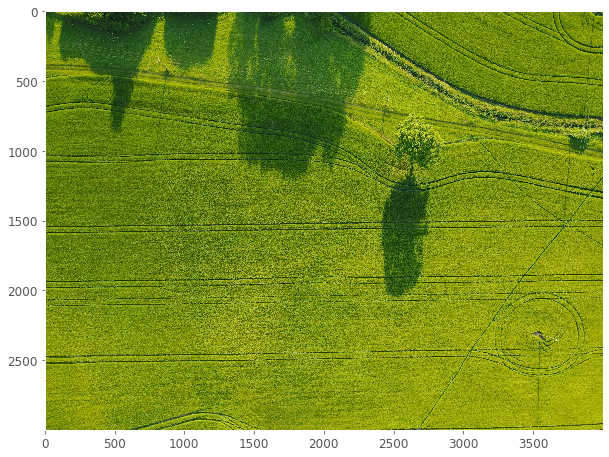

In [8]:
image_name = './images/image_4.jpg'
image = get_image(image_name)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

([<matplotlib.patches.Wedge at 0x7ffa59448190>,
 [Text(0.7571691352744023, 0.7979316390442317, '#668210'),
  Text(-0.41730410001249924, 1.0177707443784962, '#284d17'),
  Text(-1.090177111161576, 0.14667605905327982, '#96a511'),
  Text(-0.6832851311064329, -0.8620449115961796, '#486a15'),
  Text(0.6317869374262455, -0.9004694696088067, '#7e9411')])

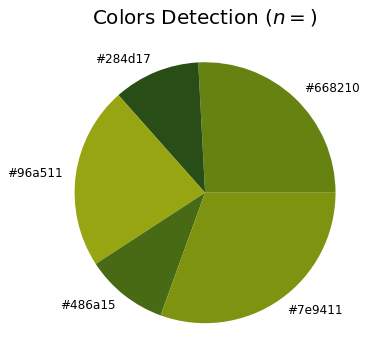

In [16]:
number_of_colors = 5
# modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
# clf = KMeans(n_clusters = number_of_colors)
# labels = clf.fit_predict(modified_image)
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)
    
counts = Counter(labels)
# sort to ensure correct color percentage
counts = dict(sorted(counts.items()))
    
center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]


plt.figure(figsize = (8, 6))
plt.title('Colors Detection ($n=$)', fontsize=20) #display number_of_colors
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

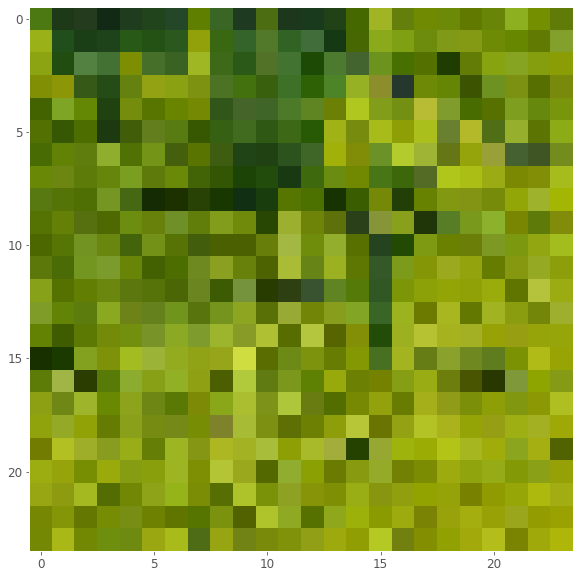

In [17]:
# resize the image
resized_image = cv2.resize(image, (24, 24))
plt.imshow(resized_image)

[array([35.77127693, 70.99900094, 23.65588511]),
 array([130.15029371, 150.60194196,  18.02733211]),
 array([ 81.63934843, 112.91351489,  18.66098244]),
 array([145.13596446, 161.28778209,  16.14211682]),
 array([ 99.25908665, 127.80827642,  16.47652337]),
 array([114.85627395, 139.92984137,  17.193276  ]),
 array([160.62621359, 173.9794241 ,  19.06409974]),
 array([54.69323332, 94.59702037, 25.27723082])]

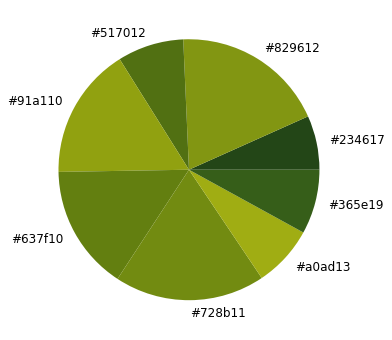

In [20]:
# this process is done two ways 
get_colors(get_image(image_name), 8, True)

# Search images using Color

In [22]:
# get all the images and store them in the images variable
import os
IMAGE_DIRECTORY = './images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

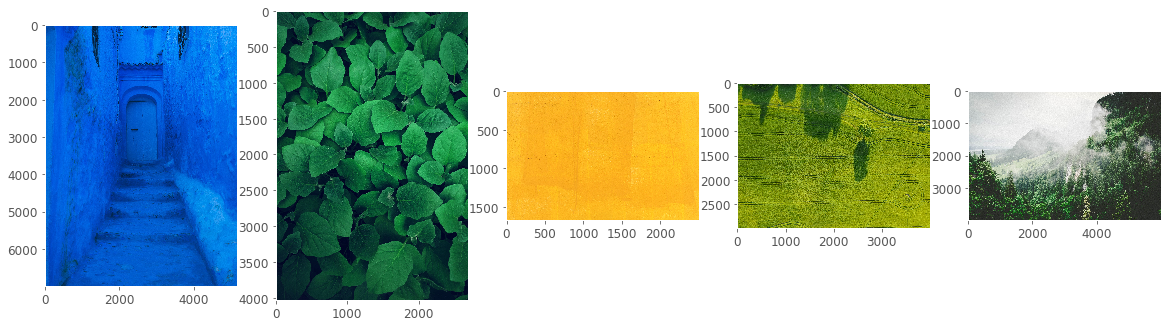

In [23]:
# plot the images
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

We define the function below. We will try to match with the top 10 colors of the image. It is highly possible that there will be no extact match for the hex codes, thus we calculate the similarity between the chosen color and the colors of the image.
We keep a threshold value such that if the difference between the chosen color and any of the selected colors is less than that threshold, we declare it as a match.
Hex values or RGB values cannot be directly compared so we first convert them to a device independant and color uniform space. We use rgb2lab to convert the values and then find the difference using deltaE_cie76. The method calculates the difference between all top 5 colors of the image and the selected color and if atleast one is below the threshold, we show the image.

In [24]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [25]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

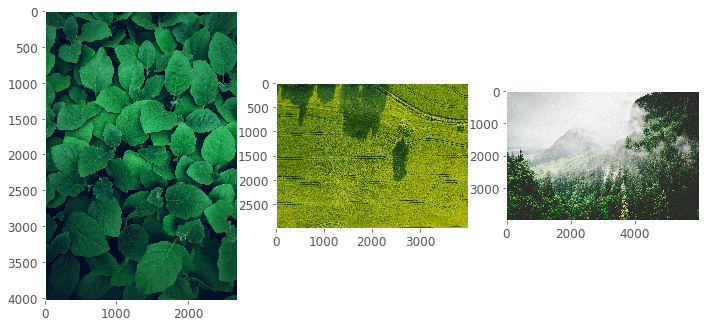

In [27]:
# test the logiv
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)